## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [2]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


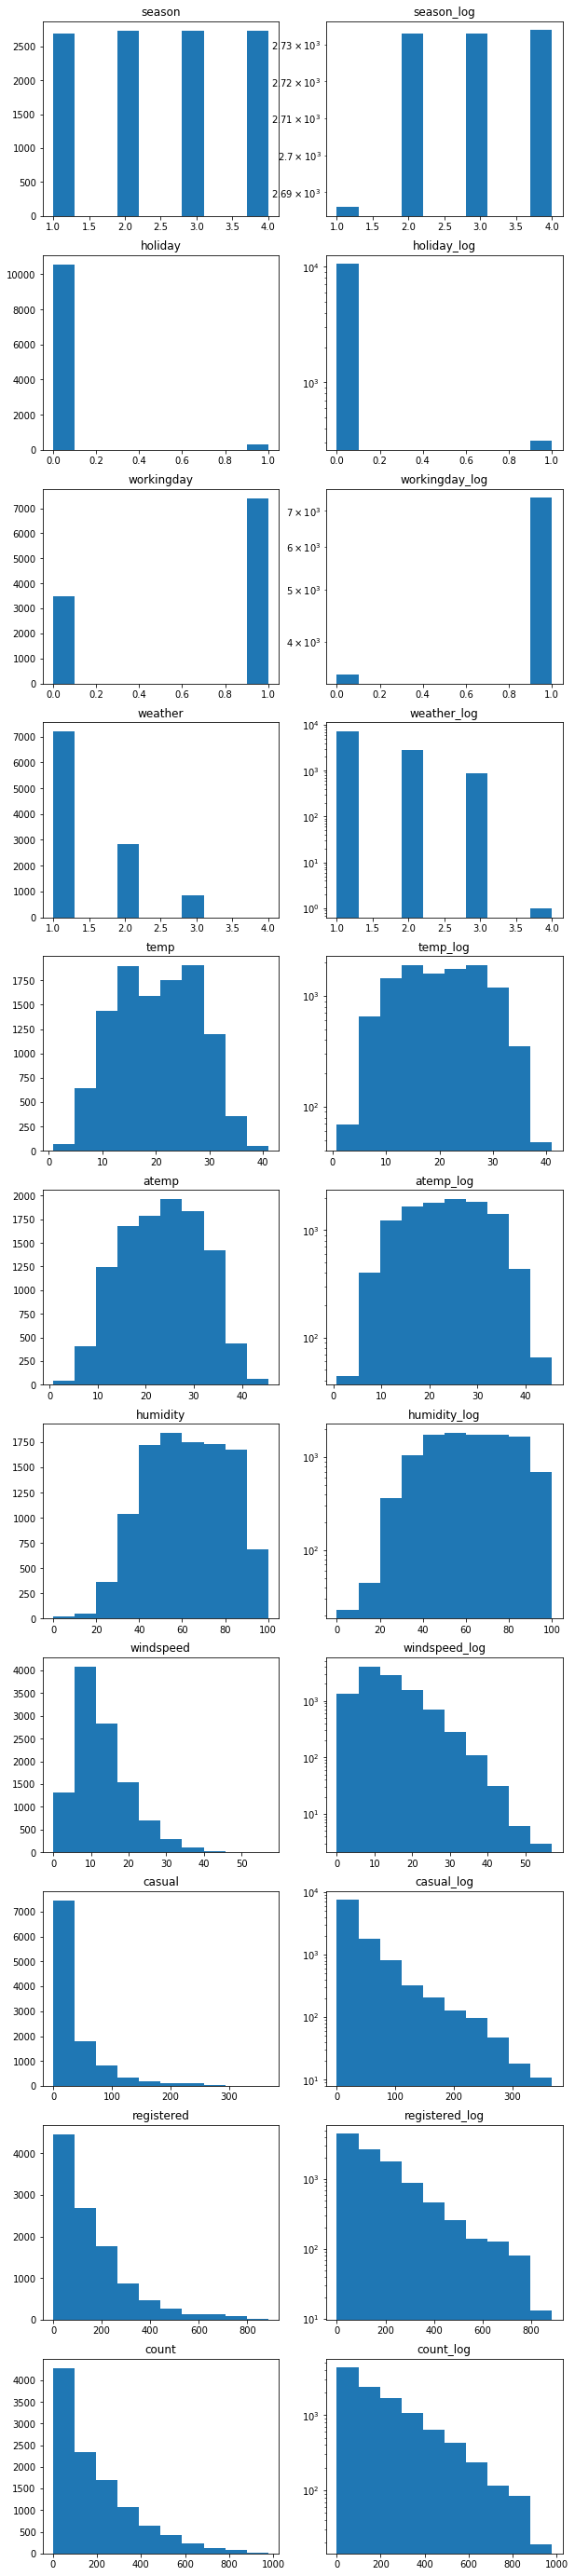

In [3]:
#for i in df.columns:
#    sns.distplot(df[i])
n = len(df.columns)    
fig, axs = plt.subplots(n, 2, figsize=(10, 50))

for i in range(n):
    axs[i, 0].hist(df[df.columns[i]])
    axs[i, 1].hist(df[df.columns[i]], log=True)
    axs[i, 0].set_title(df.columns[i])
    axs[i, 1].set_title(str(df.columns[i])+"_log")

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [33]:
### YOUR CODE HERE ###
def my_basic_research(df=df):
    n = len(df.columns)    
#     fig, axs = plt.subplots(n, 1, figsize=(10, 50))

    for i in range(n):
        print('Метрика: '+str(df.columns[i]))
        print('Cреднее: '+str(df.iloc[i].mean()))
        print('Дисперсия: '+str(df.iloc[i].var()))
        print('Квантиль - медиана : '+str(np.percentile(df.iloc[i], 50)))
        print('Кванталь - 0.75: '+str(np.percentile(df.iloc[i], 75)))
        print('Перцентиль 0.99: '+str(np.percentile(df.iloc[i], 99)))
        print("------------------------------------")

        print("Самые популярные значения метрики, топ 5")
        print(df.iloc[i].value_counts().nlargest(5))
        print("------------------------------------")

        print("Эксцесс ", kurtosis(df.iloc[i]))
        print("Ассиметрия ", skew(df.iloc[i]))
        
        print("")
        print("")
        print("")
        print("")
# #         sns.distplot(df[i])
#         plt.title("Распределение по ")
#         axs[i, 0].hist(df[df.columns[i]])
#         axs[i, 0].set_title(df.columns[i])
    
    


In [34]:
my_basic_research(df=df)

Метрика: season
Cреднее: 12.657727272727273
Дисперсия: 553.8642968181817
Квантиль - медиана : 3.0
Кванталь - 0.75: 13.6975
Перцентиль 0.99: 74.50000000000003
------------------------------------
Самые популярные значения метрики, топ 5
0.000     3
1.000     2
14.395    1
16.000    1
13.000    1
Name: 0, dtype: int64
------------------------------------
Эксцесс  4.8665144881219975
Ассиметрия  2.486847967838669




Метрика: holiday
Cреднее: 16.78681818181818
Дисперсия: 625.7503713636364
Квантиль - медиана : 8.0
Кванталь - 0.75: 22.8175
Перцентиль 0.99: 76.00000000000001
------------------------------------
Самые популярные значения метрики, топ 5
0.000     3
1.000     2
13.635    1
40.000    1
32.000    1
Name: 1, dtype: int64
------------------------------------
Эксцесс  1.686769773967196
Ассиметрия  1.6441533154396202




Метрика: workingday
Cреднее: 15.332272727272727
Дисперсия: 586.1409168181818
Квантиль - медиана : 5.0
Кванталь - 0.75: 20.3175
Перцентиль 0.99: 75.20000000000002
----

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [5]:
### YOUR CODE HERE ###



### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [6]:
### YOUR CODE HERE ###



### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [7]:
### YOUR CODE HERE ###



### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [8]:
### YOUR CODE HERE ###

